# Task 24-> Evaluation Techniques for Regression Models


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error, median_absolute_error, mean_absolute_percentage_error as mape

## Dataset with 10 features


In [2]:
np.random.seed(0)
data = {
    'Feature1': np.random.randint(1, 100, 100),
    'Feature2': np.random.rand(100) * 10,
    'Feature3': np.random.rand(100) * 20,
    'Feature4': np.random.randint(1, 50, 100),
    'Feature5': np.random.rand(100) * 30,
    'Feature6': np.random.randint(10, 100, 100),
    'Feature7': np.random.rand(100) * 40,
    'Feature8': np.random.rand(100) * 50,
    'Feature9': np.random.randint(5, 60, 100),
    'Feature10': np.random.rand(100) * 60,
    'Target': np.random.rand(100) * 100
}
df = pd.DataFrame(data)

## First 5 rows of datset

In [3]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Target
0,45,9.495711,0.332559,14,15.280262,72,20.998818,34.017433,19,14.861101,14.031602
1,48,6.625269,4.614847,8,2.591309,82,30.023801,3.160381,23,19.094011,35.899528
2,65,0.135716,15.298234,17,19.801196,81,13.340299,30.362469,30,51.526648,93.711704
3,68,6.228461,18.882470,23,6.197838,55,36.966351,23.882325,49,27.510190,92.330531
4,68,6.736596,14.999985,16,25.418260,15,34.492742,14.199999,8,26.675237,28.283685


## Split the data into features and target


In [4]:
X = df.drop('Target', axis=1)
y = df['Target']
print("Features:\n",X)
print("\nTarget:\n",y)

Features:
     Feature1  Feature2   Feature3  Feature4   Feature5  Feature6   Feature7  \
0         45  9.495711   0.332559        14  15.280262        72  20.998818   
1         48  6.625269   4.614847         8   2.591309        82  30.023801   
2         65  0.135716  15.298234        17  19.801196        81  13.340299   
3         68  6.228461  18.882470        23   6.197838        55  36.966351   
4         68  6.736596  14.999985        16  25.418260        15  34.492742   
..       ...       ...        ...       ...        ...       ...        ...   
95        86  9.825750   5.738301         9  19.200725        28  18.825958   
96        49  3.732908  13.545266        21  11.043072        35  15.129807   
97        50  4.200754   1.260766         8   9.382599        34  39.181077   
98        70  0.505881  11.112985         4  24.055085        49   6.986335   
99        42  3.654961   0.184801        22   2.113416        38  13.119520   

     Feature8  Feature9  Feature10  
0  

## Splitting dataset


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scale the features


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.05739127, -1.82378401, -1.05066488,  1.06383179,  0.26725801,
         0.4631099 , -1.49111215, -0.53673466,  2.20163814, -1.33283588],
       [ 1.08126015,  1.46292215,  0.68715932, -1.31626646, -0.31160572,
        -0.52118319, -1.5859666 ,  1.68414222,  1.98900508, -0.01761941],
       [ 0.6229777 , -1.80831056,  0.83319474, -0.45077618,  0.69632201,
         0.97494231, -0.6765815 ,  0.43100637,  0.21706292,  1.35047569],
       [-0.44634801,  0.30218286, -0.00283351,  1.49657693,  1.87676271,
         1.17180092, -0.42023792, -1.31898705,  1.28022821,  1.40589863],
       [-1.28653249, -1.0458552 ,  0.9786762 ,  1.20808017, -1.44897209,
         0.06939266,  1.16869072,  0.1805651 , -0.84610238,  0.56532748],
       [ 1.19583076, -1.34427958, -1.61929883, -1.09989389,  1.30531034,
        -0.71804181,  1.54141084, -0.43131917, -0.49171395,  0.9194405 ],
       [-0.3317774 ,  1.37418477, -0.06995054,  0.05409314,  1.48710489,
         0.4631099 ,  0.46748979, -0.31680442

## Creating a simple linear regression model


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([31.07724357, 72.64653898, 48.15387809, 38.30370141, 51.73202503,
       49.45677814, 59.05869855, 54.38658528, 52.2842486 , 53.17215464,
       42.50509802, 52.98310498, 50.65419847, 49.1166532 , 51.00020353,
       45.53483647, 58.143409  , 59.92832892, 40.84925354, 44.55012267])

## 1. Mean Absolute Error (MAE)
MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. MAE is intuitive and easy to interpret but doesn't penalize larger errors more heavily.<br> <br>
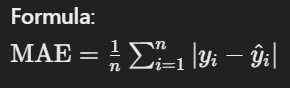

### Calculating MAE


In [9]:
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 32.16624757717575


## 2. Mean Squared Error (MSE)
MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. It’s useful for emphasizing larger errors due to squaring the differences. However, this squaring also makes the metric sensitive to outliers.<br><br>
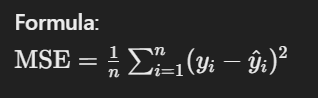

### Calculating MSE


In [10]:
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1211.1188566660805


## 3. Root Mean Squared Error (RMSE)
RMSE is the square root of the average of squared differences between prediction and actual observation. It’s a good measure of how accurately the model predicts the response and is useful when large errors are particularly undesirable. RMSE is in the same units as the target variable.<br><br>
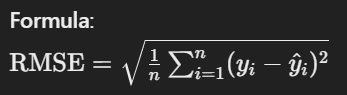

### Calculating RMSE


In [11]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 34.801132979632726


## 4. R-squared (R²)
R² is the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of goodness of fit and ranges from 0 to 1. An R² of 1 indicates that the regression predictions perfectly fit the data.<br><br>
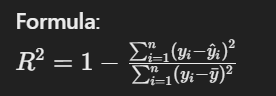

### Calculating R²

In [12]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -0.0938104785644398


## 5. Adjusted R-squared
Adjusted R² modifies the R² value by adjusting for the number of predictors in the model. It’s used to compare the goodness of fit for models with different numbers of predictors, as it penalizes adding non-significant predictors to the model.<br><br>
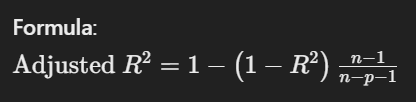

### Calculating Adjusted R²


In [13]:
n = len(y_test)
p = X_train.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adj_r2}")

Adjusted R-squared: -1.3091554547471507


## 6. Mean Absolute Percentage Error (MAPE)
MAPE measures the size of the error in percentage terms. It’s the average of the absolute percentage errors of predictions. MAPE is easy to interpret and understand, but it can be problematic if any actual yi values are zero.<br><br>
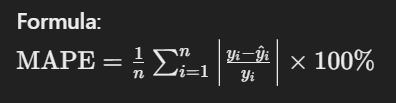

### Calculating MAPE


In [14]:
mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape_value}%")

Mean Absolute Percentage Error: 193.84858740390166%


## 7. Median Absolute Error (MedAE)
MedAE is the median of the absolute errors between predicted and actual values. It’s a robust measure of the central tendency of the error distribution and is less sensitive to outliers compared to the mean.<br><br>
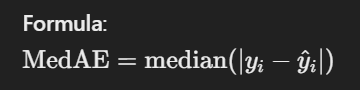

### Calculating MedAE


In [15]:
medae = np.median(np.abs(y_test - y_pred))
print(f"Median Absolute Error: {medae}")

Median Absolute Error: 31.30050426926563


## 8. Explained Variance Score
The explained variance score measures the proportion to which a model accounts for the variation (dispersion) of a given data set. An explained variance score of 1 indicates perfect fit, whereas a score of 0 indicates that the model does not explain any of the variability of the response data around its mean.<br><br>
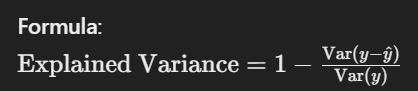

### Calculating Explained Variance Score


In [16]:
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")

Explained Variance Score: -0.05421792582419238


## 9. Huber Loss
Huber loss is a loss function used in robust regression that combines the best properties of both MAE and MSE. It is quadratic for smaller errors (like MSE) and linear for larger errors (like MAE), making it less sensitive to outliers in data.<br><br>
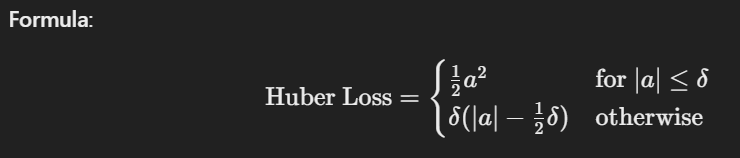

### Using HuberRegressor for Huber Loss


In [17]:
delta = 1.0  # Example delta value
huber_model = HuberRegressor(epsilon=delta, max_iter=1000)  # Increase max_iter to 1000
huber_model.fit(X_train_scaled, y_train)

HuberRegressor(epsilon=1.0, max_iter=1000)

### Make predictions


In [18]:
y_huber_pred = huber_model.predict(X_test_scaled)

### Calculating Huber Loss


In [19]:
errors = np.abs(y_test - y_huber_pred)
huber_loss = np.mean(np.where(errors <= delta, 0.5 * errors ** 2, delta * (errors - 0.5 * delta)))
print(f"Huber Loss: {huber_loss}")

Huber Loss: 31.70787687958175


## 10. Mean Squared Logarithmic Error (MSLE)
MSLE is useful when you are interested in the relative difference between the actual and predicted values. It penalizes underestimation more than overestimation, making it suitable for certain types of regression problems where this property is desired.<br><br>
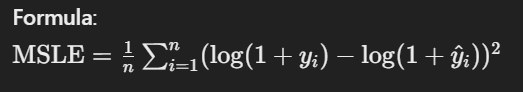

### Calculating MSLE


In [20]:
msle = np.mean((np.log1p(y_test) - np.log1p(y_pred)) ** 2)
print(f"Mean Squared Logarithmic Error: {msle}")

Mean Squared Logarithmic Error: 1.0563034983371609


## 11. Relative Absolute Error (RAE)
RAE compares the absolute error of the model's predictions to the absolute error of the mean of the actual values. It gives an indication of how much better the model is compared to simply predicting the mean of the observations.<br><br>
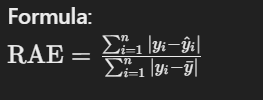

### Calculating RAE


In [21]:
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
print(f"Relative Absolute Error: {rae}")

Relative Absolute Error: 1.0905977655492605


## 12. Relative Squared Error (RSE)
RSE is similar to RAE but uses squared differences. It compares the squared error of the model’s predictions to the squared error of the mean of the actual values. It is a measure of the total variance explained by the model.<br><br>
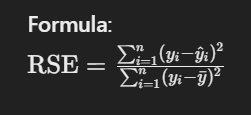

### Calculating RSE


In [22]:
rse = np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print(f"Relative Squared Error: {rse}")

Relative Squared Error: 1.0938104785644398
